In [5]:
import pandas as pd
import numpy as np
df_test=pd.read_csv("Test_new.csv")
df_train=pd.read_csv("Train_new.csv")
df_tr = pd.concat([df_test, df_train],ignore_index=True)#combining test and train to handle missing values
df_tr

C:\Users\SBI SMCB\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDW58,107.8622,NaN,Snack Foods,0.007565,20.750,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,reg,FDW14,87.3198,NaN,Dairy,0.038428,8.300,2007,OUT017,Tier 2,NaN,Supermarket Type1
2,Low Fat,NCN55,241.7538,NaN,Others,0.099575,14.600,1998,OUT010,Tier 3,NaN,Grocery Store
3,Low Fat,FDQ58,155.0340,NaN,Snack Foods,0.015388,7.315,2007,OUT017,Tier 2,NaN,Supermarket Type1
4,Regular,FDY38,234.2300,NaN,Dairy,0.118599,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3
5,Regular,FDH56,117.1492,NaN,Fruits and Vegetables,0.063817,9.800,1997,OUT046,Tier 1,Small,Supermarket Type1
6,Regular,FDL48,50.1034,NaN,Baking Goods,0.082602,19.350,2009,OUT018,Tier 3,Medium,Supermarket Type2
7,Low Fat,FDC48,81.0592,NaN,Baking Goods,0.015782,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDN33,95.7436,NaN,Snack Foods,0.123365,6.305,2002,OUT045,Tier 2,NaN,Supermarket Type1
9,Low Fat,FDA36,186.8924,NaN,Baking Goods,0.005698,5.985,2007,OUT017,Tier 2,NaN,Supermarket Type1


In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# (1) DATA CLEANING
df_tr.isna().sum() #calculating total number of nan values

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [58]:
#Item_Outlet_Sales is the target variable for sales prediction and 39% of its values are NaN
#This attribute is present only in the Test dataset
#So we do not impute teh missing values in this column
tot_nan=2439+4016
percent_nan= tot_nan/(14204*12) * 100
round(percent_nan,2)

3.79

In [59]:
#Imputing Missing Values for Item_Weight
#Since Item_Weight depends on Item_Type, NaNs in Item_Weight is replaced with the mean of Item_Weight values corresponding to
#the respective Item_Type names
lis_it_ty=list(set(df_tr["Item_Type"]))
lis_it_ty #list of Item_Type names

['Dairy',
 'Soft Drinks',
 'Others',
 'Hard Drinks',
 'Snack Foods',
 'Baking Goods',
 'Canned',
 'Seafood',
 'Health and Hygiene',
 'Household',
 'Starchy Foods',
 'Fruits and Vegetables',
 'Meat',
 'Breakfast',
 'Frozen Foods',
 'Breads']

In [60]:
dict_it_ty_wt=dict.fromkeys(lis_it_ty,[])
d1=dict.fromkeys(lis_it_ty,0)
for i in range (0,8523):
    dict_it_ty_wt[df_tr["Item_Type"][i]].append(df_tr["Item_Weight"][i])
dict_it_ty_wt #Dictionary of Item_Type with Item_Type names as keys and list of corresponding Item_Weight values as values

{'Dairy': [20.75,
  8.3,
  14.6,
  7.315,
  nan,
  9.8,
  19.35,
  nan,
  6.305,
  5.985,
  16.6,
  6.59,
  nan,
  4.785,
  16.75,
  6.135,
  19.85,
  17.85,
  nan,
  13.6,
  7.1,
  19.2,
  13.65,
  nan,
  19.2,
  6.785,
  13.0,
  5.825,
  13.8,
  12.8,
  nan,
  9.5,
  12.5,
  nan,
  5.78,
  nan,
  nan,
  10.395,
  18.35,
  nan,
  21.1,
  19.75,
  8.43,
  15.35,
  6.71,
  10.195,
  11.65,
  12.85,
  12.15,
  18.25,
  5.98,
  12.65,
  13.1,
  20.7,
  nan,
  7.855,
  13.35,
  17.25,
  nan,
  10.395,
  8.315,
  20.7,
  nan,
  21.35,
  5.88,
  nan,
  7.435,
  14.65,
  14.0,
  18.2,
  17.6,
  nan,
  7.71,
  7.81,
  16.35,
  13.0,
  nan,
  13.35,
  nan,
  16.1,
  17.85,
  5.34,
  5.51,
  6.61,
  6.38,
  16.1,
  13.65,
  19.2,
  8.71,
  17.75,
  19.35,
  nan,
  nan,
  6.44,
  12.6,
  7.935,
  18.25,
  18.5,
  6.035,
  11.8,
  6.26,
  16.5,
  15.7,
  6.635,
  nan,
  nan,
  nan,
  14.0,
  nan,
  17.75,
  17.75,
  8.155,
  17.25,
  nan,
  6.175,
  nan,
  8.18,
  8.355,
  6.905,
  20.35,
  nan,
 

In [61]:
import statistics
for j in dict_it_ty_wt:
   d1[j]=np.nanmean(dict_it_ty_wt[j])

print(d1) #Dictionay with Item_Type as keys and corresponding mean of Item_Weight as values

{'Dairy': 12.794351420093259, 'Soft Drinks': 12.794351420093259, 'Others': 12.794351420093259, 'Hard Drinks': 12.794351420093259, 'Snack Foods': 12.794351420093259, 'Baking Goods': 12.794351420093259, 'Canned': 12.794351420093259, 'Seafood': 12.794351420093259, 'Health and Hygiene': 12.794351420093259, 'Household': 12.794351420093259, 'Starchy Foods': 12.794351420093259, 'Fruits and Vegetables': 12.794351420093259, 'Meat': 12.794351420093259, 'Breakfast': 12.794351420093259, 'Frozen Foods': 12.794351420093259, 'Breads': 12.794351420093259}


In [62]:
import math
for k in range (0,8523):
    if math.isnan(df_tr["Item_Weight"][k]):
        df_tr["Item_Weight"].replace(to_replace = df_tr["Item_Weight"][k], value =d1[df_tr["Item_Type"][k]],inplace=True) 
        #replacing nan with mean
df_tr["Item_Weight"].isna().sum() #sum of nan after imputing nan values

0

In [63]:
#Imputing Missing Values for Outlet_Size
#Since Outlet_Size depends on Outlet_Type, NaNs in Outlet_Size is replaced with the mode of Outlet_Size values corresponding to
#the respective Outlet_Type names
lis_out_ty=list(set(df_tr["Outlet_Type"]))
lis_out_ty #list of Outlet_Type

['Grocery Store',
 'Supermarket Type2',
 'Supermarket Type1',
 'Supermarket Type3']

In [64]:
dict_out_ty_sz=dict.fromkeys(lis_out_ty,[])
d2=dict.fromkeys(lis_out_ty,0)
for i in range (0,8523):
    dict_out_ty_sz[df_tr["Outlet_Type"][i]].append(df_tr["Outlet_Size"][i])
dict_out_ty_sz
import scipy as stats
df_out_ty_sz=pd.DataFrame(dict_out_ty_sz)
df_out_ty_sz.mode(dropna=True) #calculating the mode of the Outlet_Size corresponding to Outlet_Type

,Grocery Store,Supermarket Type2,Supermarket Type1,Supermarket Type3
0,Medium,Medium,Medium,Medium


In [65]:
import math
df_tr["Outlet_Size"].fillna("Medium",inplace=True) 
df_tr["Outlet_Size"].isna().sum() #nan count after imputing Outlet_Size's nan values

0

In [66]:
df_tr #cleaned dataset

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDW58,107.8622,NaN,Snack Foods,0.007565,20.750000,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,reg,FDW14,87.3198,NaN,Dairy,0.038428,8.300000,2007,OUT017,Tier 2,Medium,Supermarket Type1
2,Low Fat,NCN55,241.7538,NaN,Others,0.099575,14.600000,1998,OUT010,Tier 3,Medium,Grocery Store
3,Low Fat,FDQ58,155.0340,NaN,Snack Foods,0.015388,7.315000,2007,OUT017,Tier 2,Medium,Supermarket Type1
4,Regular,FDY38,234.2300,NaN,Dairy,0.118599,12.794351,1985,OUT027,Tier 3,Medium,Supermarket Type3
5,Regular,FDH56,117.1492,NaN,Fruits and Vegetables,0.063817,9.800000,1997,OUT046,Tier 1,Small,Supermarket Type1
6,Regular,FDL48,50.1034,NaN,Baking Goods,0.082602,19.350000,2009,OUT018,Tier 3,Medium,Supermarket Type2
7,Low Fat,FDC48,81.0592,NaN,Baking Goods,0.015782,12.794351,1985,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDN33,95.7436,NaN,Snack Foods,0.123365,6.305000,2002,OUT045,Tier 2,Medium,Supermarket Type1
9,Low Fat,FDA36,186.8924,NaN,Baking Goods,0.005698,5.985000,2007,OUT017,Tier 2,Medium,Supermarket Type1


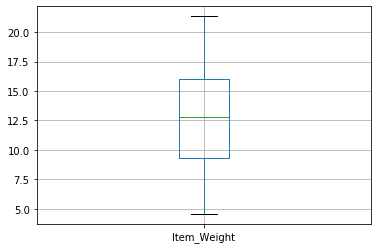

In [67]:
df_tr.boxplot(column='Item_Weight', return_type='axes');

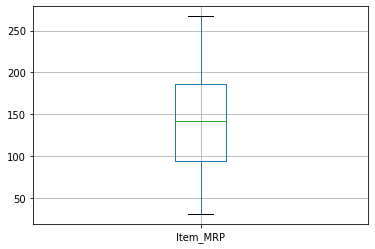

In [68]:
df_tr.boxplot(column='Item_MRP', return_type='axes');

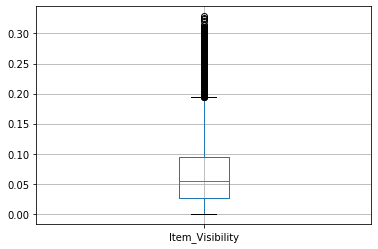

In [69]:
df_tr.boxplot(column='Item_Visibility', return_type='axes');

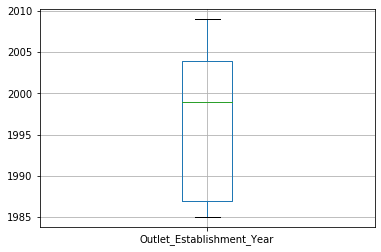

In [70]:
df_tr.boxplot(column='Outlet_Establishment_Year', return_type='axes');

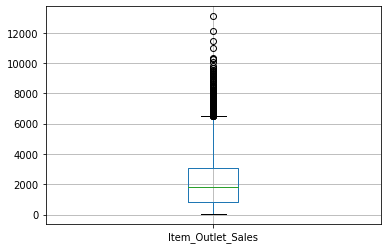

In [71]:
df_tr.boxplot(column='Item_Outlet_Sales', return_type='axes');

In [72]:
# Item_Outlet_Sales, Item_Visibility, Outlet_Establishment_Year seem to have extreme values, but we do not consider them as
# outliers, the explaination is given in the ppt

In [73]:
#Change categories of low fat:
print('Original Categories:')
print(df_tr['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
df_tr['Item_Fat_Content'] = df_tr['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print( df_tr['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [74]:
# (2) Normalization and Standardization
df_num = df_tr.select_dtypes(include=[np.number])
df_num #selecting numerical columns

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,107.8622,NaN,0.007565,20.750000,1999
1,87.3198,NaN,0.038428,8.300000,2007
2,241.7538,NaN,0.099575,14.600000,1998
3,155.0340,NaN,0.015388,7.315000,2007
4,234.2300,NaN,0.118599,12.794351,1985
5,117.1492,NaN,0.063817,9.800000,1997
6,50.1034,NaN,0.082602,19.350000,2009
7,81.0592,NaN,0.015782,12.794351,1985
8,95.7436,NaN,0.123365,6.305000,2002
9,186.8924,NaN,0.005698,5.985000,2007


In [75]:
#Normalizing numerical columns
from sklearn import preprocessing

x = df_num.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)
df_norm.rename(columns = {"0": "Item_MRP", 
                     "1":"Item_Outlet_Sales","2":"Item_Visibility","3":"Item_Weight","4":"Outlet_Establishment_Year"}, 
                                 inplace = True)
df_norm.columns = ["Item_MRP","Item_Outlet_Sales","Item_Visibility","Item_Weight","Outlet_Establishment_Year"] 
df_norm

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,0.325012,NaN,0.023036,0.964275,0.583333
1,0.237819,NaN,0.117018,0.222983,0.916667
2,0.893316,NaN,0.303221,0.598095,0.541667
3,0.525233,NaN,0.046860,0.164335,0.916667
4,0.861381,NaN,0.361153,0.490584,0.000000
5,0.364430,NaN,0.194333,0.312295,0.500000
6,0.079854,NaN,0.251534,0.880917,1.000000
7,0.211246,NaN,0.048060,0.490584,0.000000
8,0.273574,NaN,0.375666,0.104198,0.708333
9,0.660456,NaN,0.017353,0.085144,0.916667


In [76]:
#Standardization of normalized columns
names = df_norm.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_norm)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,-0.533831,NaN,-1.134699,1.879250,0.139681
1,-0.864708,NaN,-0.534917,-1.061178,1.095319
2,1.622763,NaN,0.653405,0.426749,0.020226
3,0.225966,NaN,-0.982657,-1.293815,1.095319
4,1.501577,NaN,1.023121,0.000293,-1.532686
5,-0.384245,NaN,-0.041502,-0.706910,-0.099229
6,-1.464153,NaN,0.323548,1.548599,1.334228
7,-0.965547,NaN,-0.974998,0.000293,-1.532686
8,-0.729026,NaN,1.115745,-1.532355,0.498045
9,0.739109,NaN,-1.170970,-1.607933,1.095319


In [77]:
round(scaled_df.mean(),2)# standardized numerical columns with mean=0

Item_MRP                     0.0
Item_Outlet_Sales            0.0
Item_Visibility              0.0
Item_Weight                  0.0
Outlet_Establishment_Year   -0.0
dtype: float64

In [78]:
round(scaled_df.std(),2)# standardized numerical columns with standard deviation=1

Item_MRP                     1.0
Item_Outlet_Sales            1.0
Item_Visibility              1.0
Item_Weight                  1.0
Outlet_Establishment_Year    1.0
dtype: float64

C:\Users\SBI SMCB\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\SBI SMCB\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\SBI SMCB\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\SBI SMCB\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

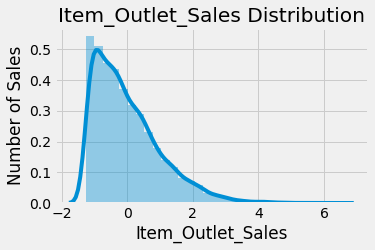

In [134]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5,3))
sns.distplot(scaled_df.Item_Outlet_Sales, bins = 30)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [90]:
it_out_sales_drpna = train["Item_Outlet_Sales"].dropna()


In [6]:
#splitting the train and test datasets
#Divide into test and train:
train = df_tr.loc[df_tr['Item_Outlet_Sales']!="NaN"]
test = df_tr.loc[df_tr['Item_Outlet_Sales']=="NaN"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv(r"train_modified.csv",index=False)
test.to_csv(r"test_modified.csv",index=False)
print(train.head())
print(test.head())

C:\Users\SBI SMCB\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\SBI SMCB\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


  Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales    Item_Type  \
0          Low Fat           FDW58  107.8622                NaN  Snack Foods   
1              reg           FDW14   87.3198                NaN        Dairy   
2          Low Fat           NCN55  241.7538                NaN       Others   
3          Low Fat           FDQ58  155.0340                NaN  Snack Foods   
4          Regular           FDY38  234.2300                NaN        Dairy   

   Item_Visibility  Item_Weight  Outlet_Establishment_Year Outlet_Identifier  \
0         0.007565       20.750                       1999            OUT049   
1         0.038428        8.300                       2007            OUT017   
2         0.099575       14.600                       1998            OUT010   
3         0.015388        7.315                       2007            OUT017   
4         0.118599          NaN                       1985            OUT027   

  Outlet_Location_Type Outlet_Size    

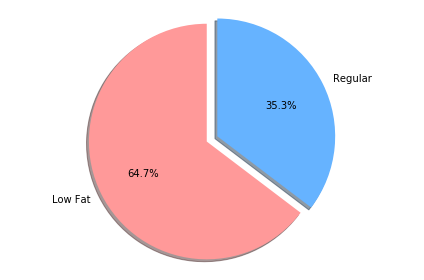

In [112]:
# (3) Graph Visualization
# (i) Univariate Analysis
# Visualizing Item_Fat_Content
labels = train['Item_Fat_Content'].unique()
sizes = list(train['Item_Fat_Content'].value_counts())

explode = (0, 0.1)
#add colors
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)

ax1.axis('equal')
plt.tight_layout()
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

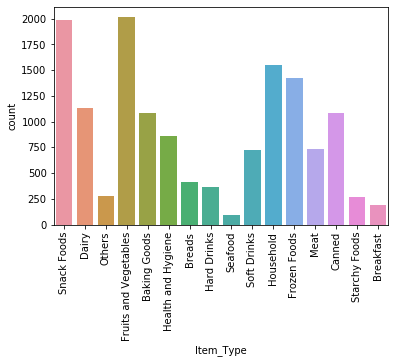

In [113]:
# Visualizing Item_Type
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)


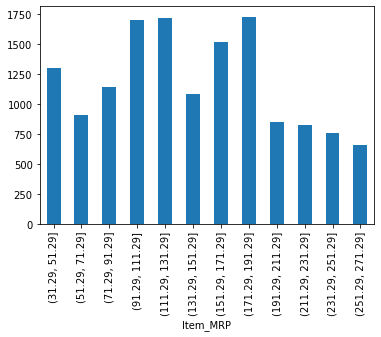

In [114]:
#Visualizing Item_MRP
def createList(r1, r2): 
    return np.arange(r1, r2+20, 20) 
r1, r2 = min(train['Item_MRP']),max(train['Item_MRP'])  
bins = createList(r1, r2)
df_itmrp = train.groupby(pd.cut(train['Item_MRP'], bins=bins)).Item_MRP.count()
df_itmrp.plot(kind='bar')

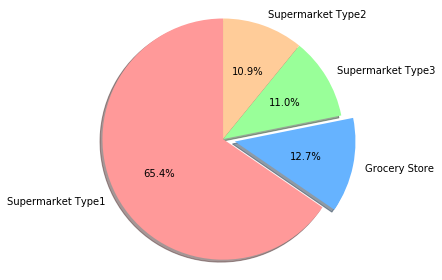

In [115]:
# Visualizing Outlet_Type
labels = train['Outlet_Type'].unique()
sizes = list(train['Outlet_Type'].value_counts())

explode = (0, 0.1,0,0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)

ax1.axis('equal')
plt.tight_layout()
plt.show()


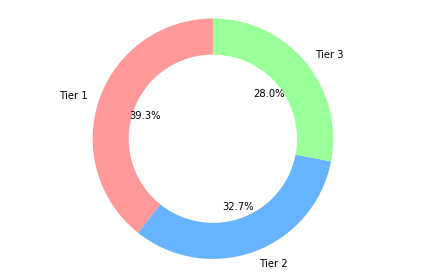

In [116]:
#Visualizing Outlet_LOcation_Type
# Pie chart
labels = train['Outlet_Location_Type'].unique()
sizes =  list(train['Outlet_Location_Type'].value_counts())
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()


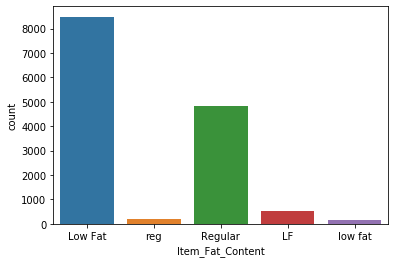

In [8]:
#Visualizing Item_Fat_Content
sns.countplot(train.Item_Fat_Content)

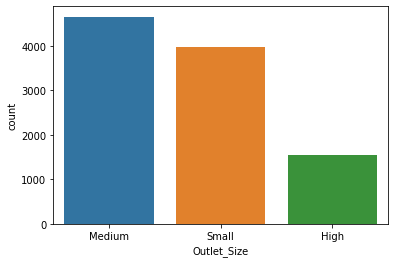

In [9]:
#Visualizing Outlet_Size

sns.countplot(train.Outlet_Size)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

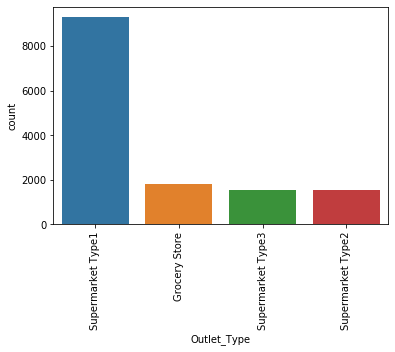

In [10]:
#Visualizing Outlet_Type
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

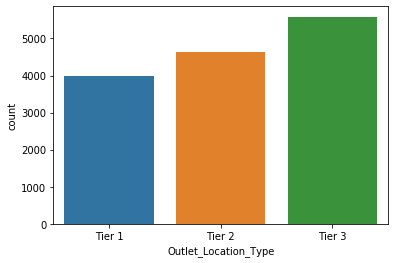

In [11]:
#Visualizing Outlet_Location_Type
sns.countplot(train.Outlet_Location_Type)

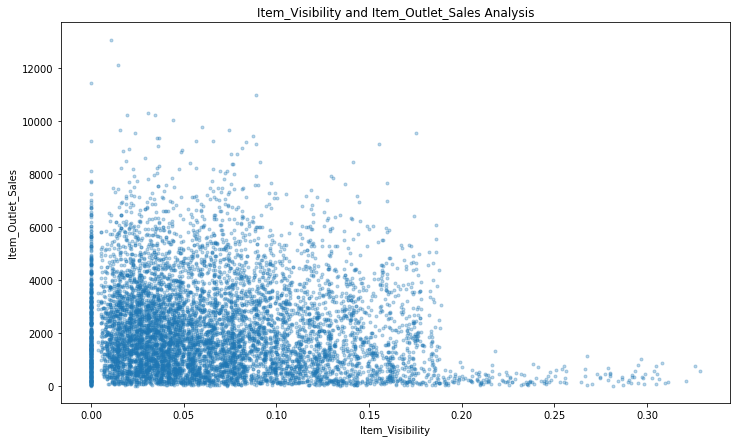

In [117]:
# (ii) Biivariate Analysis (Using insights from Univariate Analysis)
# Visualizing the impact of Item_Visibility on Item_Outlet_Sales
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

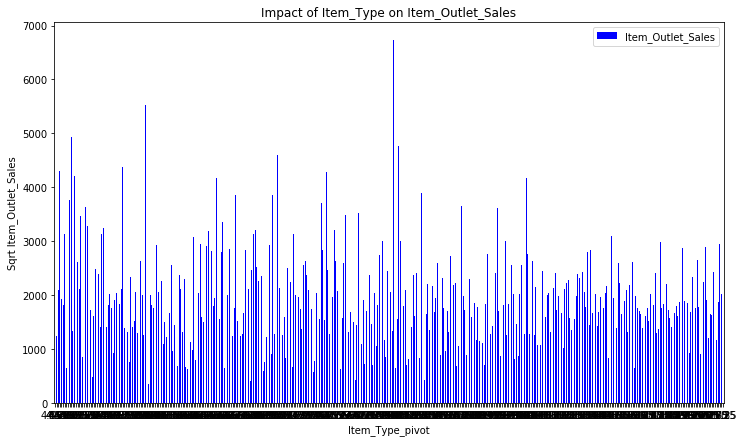

In [118]:
# Visualizing the impact of Item_Visibility on Item_Outlet_Sales
Item_Type_pivot = train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Weight_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type_pivot")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

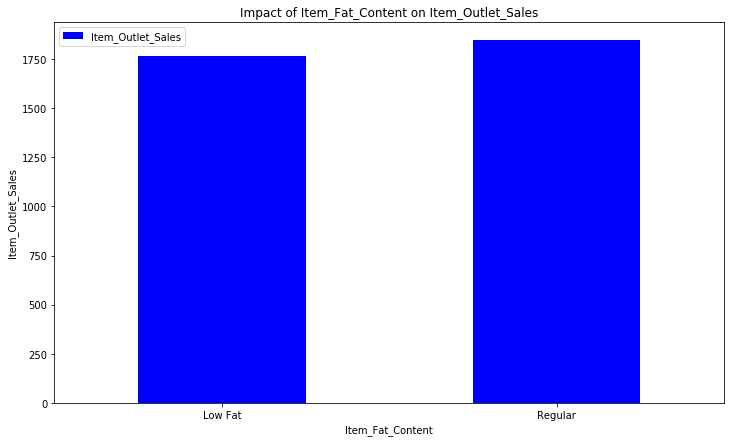

In [119]:
# Visualizing the impact of Item_Fat_Content on Item_Outlet_Sales
Item_Fat_Content_pivot =train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

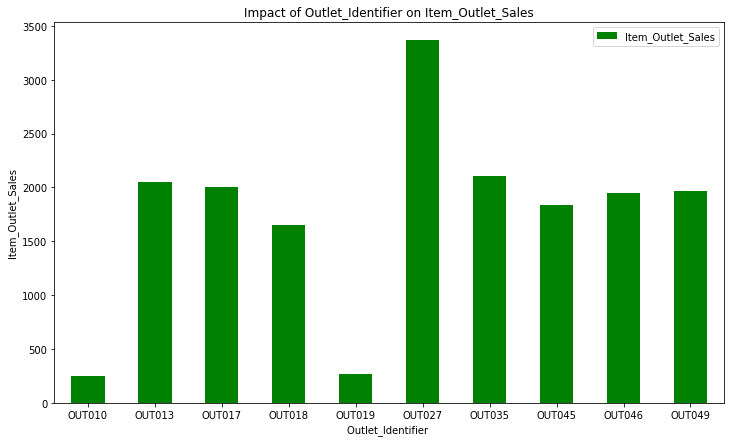

In [120]:
#Visualizing the impact of Outlet_Identifier on Item_Outlet_Sales
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel('Outlet_Identifier ')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Identifier on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

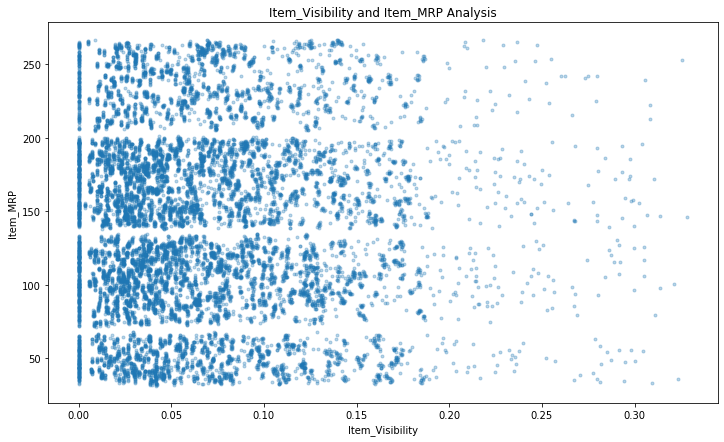

In [121]:
#Visualizing the impact of Item_Visibility on Item_MRP
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_MRP")
plt.title("Item_Visibility and Item_MRP Analysis")
plt.plot(train.Item_Visibility, train["Item_MRP"],'.', alpha = 0.3)

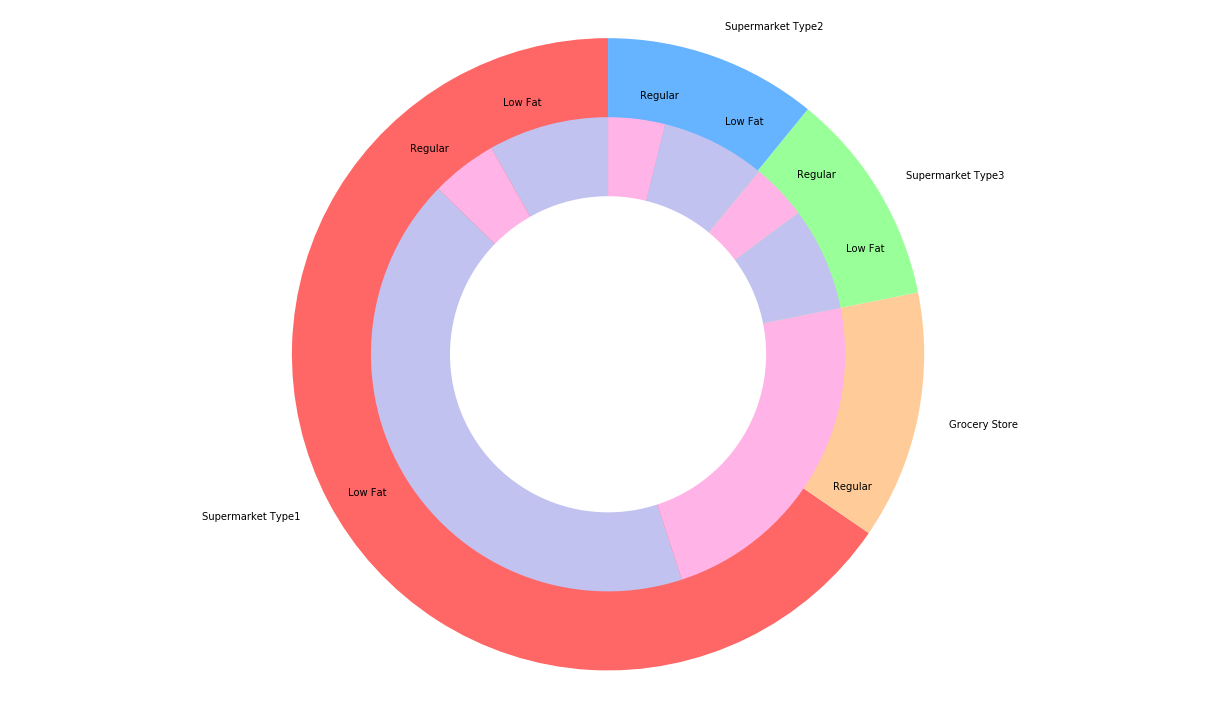

In [122]:
#Visualizing the the Item_Fat_Content of items sold by each Outlet_Type
labels = train['Outlet_Type'].unique()
sizes = train['Outlet_Type'].value_counts()
labels_fat = ['Low Fat','Regular','Low Fat','Regular','Low Fat','Regular','Low Fat','Regular']
sizes_fat = [1165,640,6013,3281,999,547,1008,551]
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.figure(figsize=(17,10))
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_fat,labels=labels_fat,colors=colors_gender,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

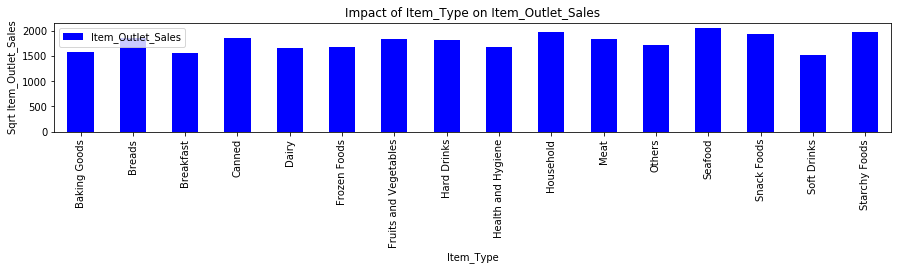

In [124]:
#Visualizing the impact of Item_MRP and Item_VIsibility on Item_Outlet_Sales
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(15,2))
plt.xlabel("Item_Type")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

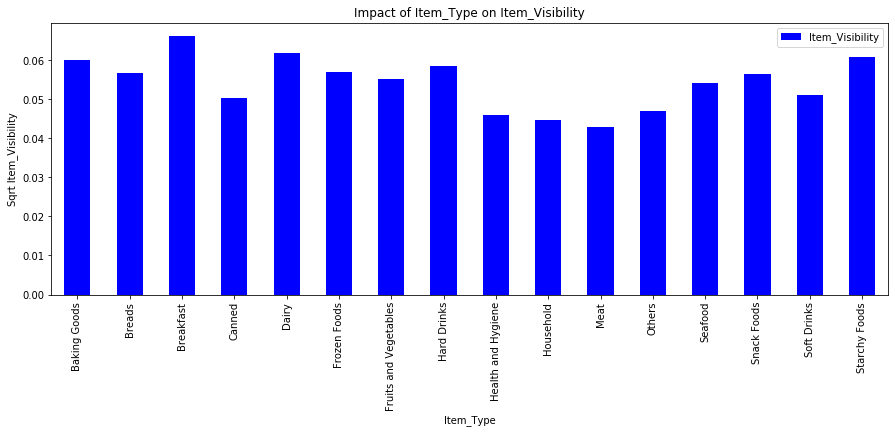

In [13]:
#Visualizing the impact of Item_Type on Item_Visibility
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(15,5))
plt.xlabel("Item_Type")
plt.ylabel("Sqrt Item_Visibility")
plt.title("Impact of Item_Type on Item_Visibility")
plt.xticks(rotation=90)
plt.show()

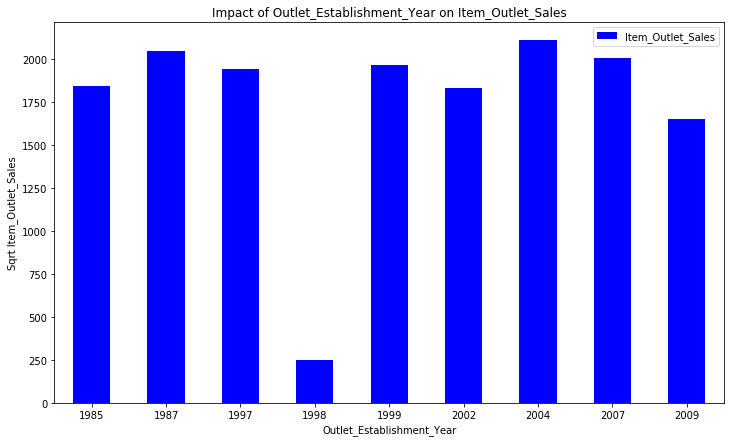

In [14]:
#Visualizing the impact of Outlet_Establishment_Year on Item_Outlet_Sales
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

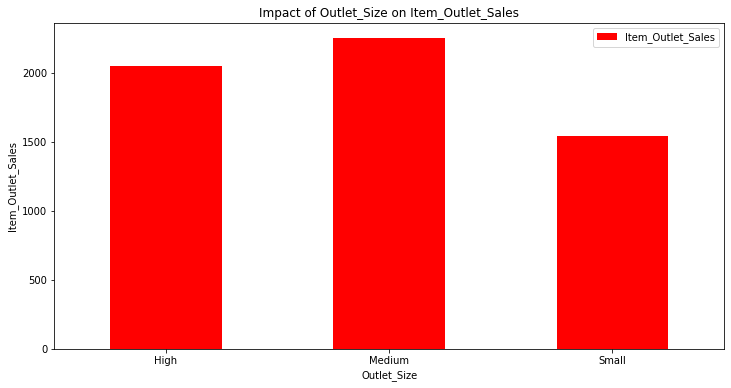

In [18]:
#Visualizing the impact of Outlet_Size on Item_Outlet_Sales
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='red',figsize=(12,6))
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Size on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

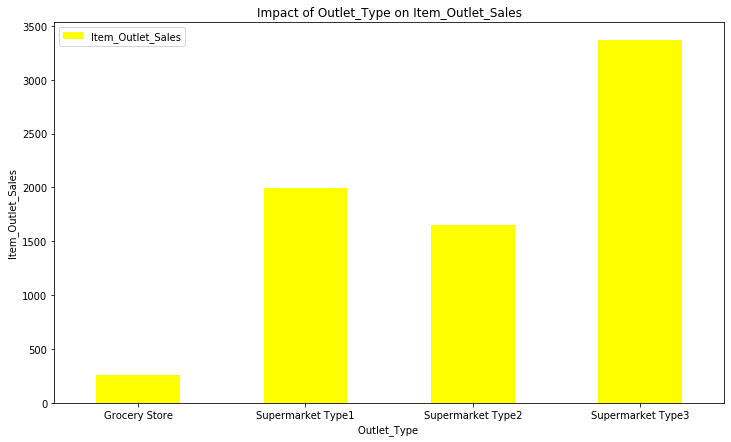

In [17]:
#Visualizing the impact of Outlet_Type on Item_Outlet_Sales
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='yellow',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

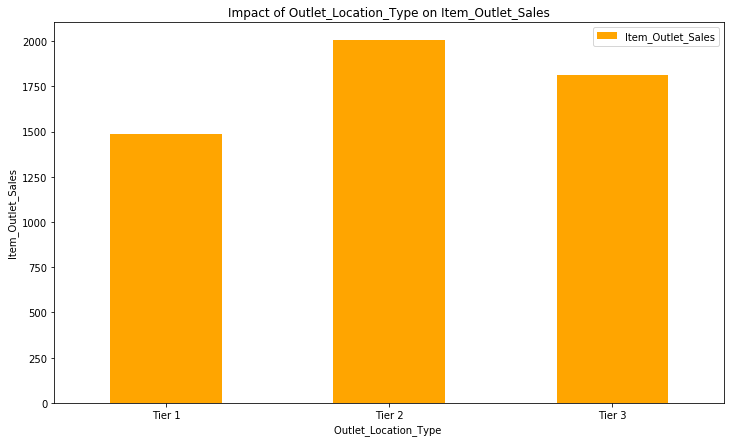

In [16]:
#Visualizing the impact of Outlet_Location_Type on Item_Outlet_Sales
Outlet_Location_Type_pivot = \
train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='orange',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

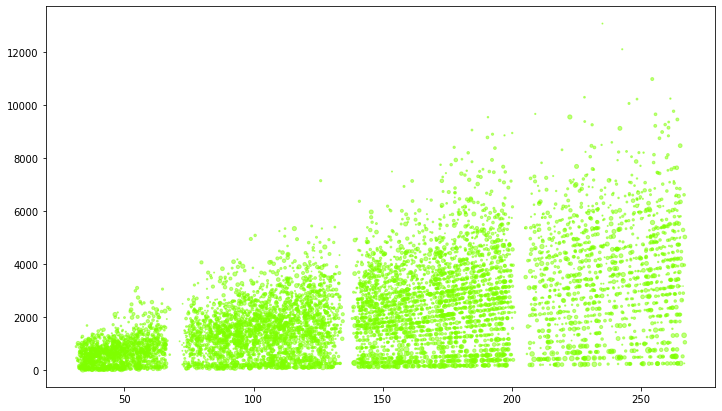

In [125]:
#(iii)Trivariate Analysis
#Visualizing the impact of Item_MRP and Item_VIsibility on Item_Outlet_Sales
plt.figure(figsize=(12,7))
x=train['Item_MRP']
y=train['Item_Visibility']
z=train['Item_Outlet_Sales']
plt.scatter(x,z,s=y*100,c='Chartreuse',alpha=0.5) #Item_Visibility (between 0-1) is converted into percentage

In [105]:
# (4)HYPOTHESIS TESTING
# (i) H0 : The average Item_Outlet_Sales for the population is lesser than or equal to 2500
# H0 : mean <= 2500
# H1 : mean > 2500
sample_it_out_sales = it_out_sales_drpna.sample(n=100) 
sample_it_out_sales

13293      36.6190
12130    2535.3664
11269    2854.9504
8198     1326.2736
10212     865.5400
7658     2713.1350
11543    1061.9510
10482    3237.1196
11809    2162.5184
6922     3115.9440
14161     459.4020
13894    1917.5040
8602     2093.2752
7554      294.2836
11870    6371.7060
10196    4379.6324
9338     2739.1012
14078     830.9184
10473    2444.8176
13363     786.9756
7277     1733.0774
11917    3397.5774
12697    8062.8380
6219     1049.9666
10787     159.1262
12936     517.3266
10458    3375.6060
10810    3427.5384
11394    2404.8696
11085     447.4176
           ...    
9437     5552.1062
11214    2182.4924
12328     379.5060
8247     1832.2816
6225     1531.3400
12865    1669.8264
7032       89.8830
6611      743.0328
12207    2145.2076
9824     2439.4912
8067     3453.5046
8499      263.6568
11720    1757.7120
9072     2376.9060
10277    3354.3004
13243    7717.9536
8522     5851.0504
12208     331.5684
8583     2566.6590
6240     1966.7732
11728    1488.0630
14052     18

In [161]:
sam_it_out_sales_mean=sample_it_out_sales.mean()
sam_it_out_sales_std=sample_it_out_sales.std()

In [107]:
pop_mean = it_out_sales_drpna.mean()
print(pop_mean)

2181.2889135750365


In [162]:
n=100
z_score = (sam_it_out_sales_mean - 2500)/(sam_it_out_sales_std/n**0.5)
print(round(z_score,2))

-0.82


In [164]:
# alpha= 0.05 confidence interval = 95%
# We need to perform lower tail test as H1: sample_mean <2500
p = 0.2061
print(round(p,3))
# Since p > 0.05, we don't  reject the null hypothesis
# Hypothesis testing's result is verified as population mean = 2181.29 which is lesser than 2500

0.206


In [158]:
#(ii) H0 : The mean Item_MRP for the population is equal to 150
# H0 : mean = 150
# H1 : measn != 150 
sample_it_mrp = train['Item_MRP'].sample(n=100) 
pop_std_it_mrp= train['Item_MRP'].std()
print(round(pop_std_it_mrp,3))
sam_it_mrp_mean =sample_it_mrp .mean()
sam_it_mrp_std =sample_it_mrp .std()
pop_mean_it_mrp = train['Item_MRP'].mean()
print(round(pop_mean_it_mrp,3))


62.087
141.005


In [159]:
n=100
z_score1 = (sam_it_mrp_mean-150)/(sam_it_mrp_std/(n**0.5))
print(round(z_score1,2))

-3.5


In [ ]:
#test statistic avlues are -1.45 and 1.45
# -3.5 < Z(alpha)
# -3.5 < -1.96
# The test statistic is in the rejection region, so H0 is  rejected
# Population mean is not equal to 150

In [152]:
# alpha= 0.05 confidence interval = 95%
# We need to perform 2 tail test as H1: sample_mean !=150
p_value= (2*0.0735)
print(p_value)
# Since p < 0.05, we reject the null hypothesis
# Hypothesis testing's result is verified as population mean = 141.005 which is not equal to 150

0.147


In [110]:
# (5) Finding Correlation between Item_Visibility and Item_Outlet_Sales
corr_coff1=train.corr(method ='pearson')['Item_Visibility']['Item_Outlet_Sales']
print(corr_coff1)

-0.12862461222077062


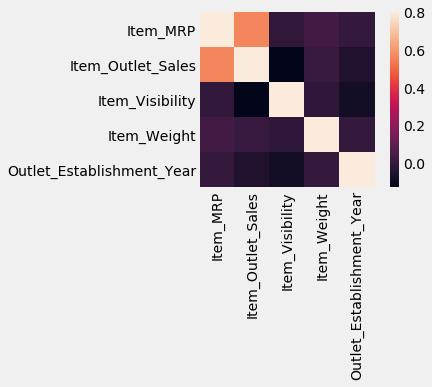

In [156]:
#Visualizing the correlation between Item_Outlet_Sales and Item_Visibility 
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes
corr =numeric_features.corr()
#correlation matrix
f, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(corr, vmax=.8, square=True);